In [1]:
import ipyparallel as ipp

import matplotlib.pyplot as plt
#%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import scipy.sparse.linalg as spsl

import integrator
import sampler #as sampler
import model #as model
# import diffusionmap as dm
# import statistics_dfm as stat

import numpy as np
from simtk import openmm, unit
# from openmmtools.constants import kB

from pydiffmap import diffusion_map as dmpy
import helpers
import model

Maximal position value in one direction is 0.86477354000000006
PBC box size set to 8.6477354000000002


In [2]:

methodName='T300/frontier_points_corner_euclidean'#'frontier_points_corner_euclidean'#'frontier_points_corner'#

############################

#######################
# simulation temperature
T=300.0
# target temperature
T_target=300.0

metric_choice = 'euclidean'#'euclidean'#'rmsd'#

computeReference=0

if methodName=='std_ref':
    addReference=0
else:
    addReference=1

  
dataName='Results/'
folderName='/Users/zofia/github/DFM/'
modelName='Alanine'

dataFolderName = folderName+dataName+modelName+'/'+methodName

# results from this code will be saved here:
simulationFolder=folderName+dataName+'/TemporaryFigures_'+metric_choice+'/'+modelName+'/'+methodName



mdl=model.Model(modelName)
mdlTopology=mdl.testsystem.topology
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
# print (mdl.testsystem.positions)
# X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)





temperature =  T * unit.kelvin#300 * unit.kelvin
temperature_target =  T_target * unit.kelvin

gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

temperatureAlpha= (T)* unit.kelvin

# simulation class sampler takes integrator class with chosen parameters as input
intg=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, dt=dt,  temperatureAlpha=temperatureAlpha)
smpl=sampler.Sampler(model=mdl, integrator=intg, algorithm=0, dataFileName='Data')

# this will be used only to compare the target distributions
integrator_target=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature_target, dt=dt,  temperatureAlpha=temperatureAlpha)
smpl_target=sampler.Sampler(model=mdl, integrator=integrator_target, algorithm=0, dataFileName='Data')

newpath = os.path.join(os.getcwd(),simulationFolder)
if not os.path.exists(newpath):
        os.makedirs(newpath)



Maximal position value in one direction is 0.86477354000000006
PBC box size set to 8.6477354000000002
nanometer
System has 22 particle(s)
666.836193337 K
471.907792167 K


In [3]:
dataFolderName

'/Users/zofia/github/DFM/Results/Alanine/T300/frontier_points_corner_euclidean'

In [4]:
def compute_dihedrals_phi(X_FT):
    psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
    
    inp=md.Trajectory(X_FT, md.Topology().from_openmm(smpl.model.testsystem.topology))

    Y = md.geometry.compute_dihedrals(inp, [phi_indices, psi_indices]) 
    return Y[:,0]

def compute_dihedrals_psi(X_FT):
    psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
    
    inp=md.Trajectory(X_FT, md.Topology().from_openmm(smpl.model.testsystem.topology))

    Y = md.geometry.compute_dihedrals(inp, [phi_indices, psi_indices]) 
    return Y[:,1]

colective_variable = compute_dihedrals_psi
cv_name = 'Dihedral angle psi'




In [5]:
# if metric_choice == 'rmsd':
#     al = False
# elif metric_choice == 'euclidean':
#     al = False

# modnr=1000
# X_FT = helpers.loadData(dataFolderName+'/Traj/*.h5', mdl.testsystem.topology, modnr, align=al)
# print('Loaded trajectory of length '+repr(X_FT.shape[0]))
# # X_FT =X_FT[:finalLength]
# # print('Final lenght of trajectory is '+repr(X_FT.shape[0]))
# # X_FT=X_FT[::modnr]
# # print('After subsampling, the data length is '+repr(len(X_FT)))

# #compute collective variable
# r=colective_variable(X_FT)
# cv=r

# plt.plot(range(len(r)), r)
# plt.ylabel(cv_name)
# plt.savefig(simulationFolder+'/colvar.png')

# plt.show()

In [6]:
# import MDAnalysis as mda
# from MDAnalysis.analysis import align
# from MDAnalysis.analysis.rms import rmsd
# #from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small

# trj = mda.Universe('/Users/zofia/github/DFM/alanine-ff96.pdb', X_FT) 
# print(trj.trajectory)
# ref = mda.Universe('/Users/zofia/github/DFM/alanine-ff96.pdb')#, X_FT[0,:,:]) 
# #print(ref)
# alignment = align.AlignTraj(trj, trj)#, filename='rmsfit.dcd')
# alignment.run()
# X_aligned = np.zeros(X_FT.shape)
# ci=0
# for ts in trj.trajectory:
#     X_aligned[ci] = trj.trajectory.ts.positions
#     ci=ci+1
    
# #X_aligned = (trj.trajectory.positions)
# print(X_aligned.shape)
# print(alignment)
# X_FT=X_aligned

In [7]:
def compute_free_energy(cv, weights=None, nrbins=100):


    pi_marginal, bin_edges = np.histogram(cv, bins = nrbins, weights = weights, density=True)
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    bin_centers = bin_edges[:-1] + 0.5*bin_widths
    free_energy= - np.log(pi_marginal)

    return free_energy, bin_centers

In [8]:
# cv=colective_variable(X_FT)

# free_energy_300_ref, bin_centers = compute_free_energy(cv, nrbins = 100)

# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)
# ax.scatter(bin_centers, free_energy_300_ref, s=5, c='r', marker='o')
# plt.show()

In [9]:
#metric_choice = 'rmsd'


Loaded trajectory of length 8047


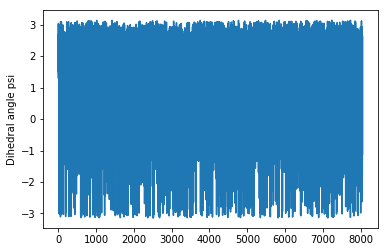

In [10]:
methodName='T300/frontier_points_corner_euclidean'#'frontier_points_corner'#'frontier_points_corner'#
modnr = 1
metric_choice = 'euclidean'
dataFolderName=folderName+dataName+modelName+'/'+methodName

if metric_choice == 'rmsd':
    al = False
elif metric_choice == 'euclidean':
    al = False

# for short traj- load from dataFolderName+'/shortTraj.h5'
X_FT =helpers.loadData(dataFolderName+'/shortTraj.h5', mdl.testsystem.topology, modnr, align=False)
#X_FT = helpers.loadData(dataFolderName+'/Traj/*.h5', mdl.testsystem.topology, modnr, align=al)
print('Loaded trajectory of length '+repr(X_FT.shape[0]))


#compute collective variable
cv=colective_variable(X_FT)

plt.plot(range(len(cv)), cv)
plt.ylabel(cv_name)
plt.savefig(simulationFolder+'/colvar.png')

plt.show()

In [11]:
# trjSave=md.Trajectory(X_FT, smpl.model.testsystem.topology)
# trjSave.save(dataFolderName+'/shortTraj.h5')

In [12]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small

trj = mda.Universe('/Users/zofia/github/DFM/alanine-ff96.pdb', X_FT) 
print(trj.trajectory)
ref = mda.Universe('/Users/zofia/github/DFM/alanine-ff96.pdb')#, X_FT[0,:,:]) 
print(ref)
# trj = mda.Universe('/Users/zofia/github/DFM/alanine.xyz', X_FT) 
# print(trj.trajectory)
# ref = mda.Universe('/Users/zofia/github/DFM/alanine.xyz')#, X_FT[0,:,:]) 


alignment = align.AlignTraj(trj, trj)#, filename='rmsfit.dcd')
alignment.run()
X_aligned = np.zeros(X_FT.shape)
ci=0
for ts in trj.trajectory:
    X_aligned[ci] = trj.trajectory.ts.positions
    ci=ci+1
    
#X_aligned = (trj.trajectory.positions)
print(X_aligned.shape)
print(alignment)
X_FT=X_aligned

/Users/zofia/miniconda3/lib/python3.6/site-packages/MDAnalysis/__init__.py:245: UserWarning: #####
MDAnalysis on python 3 is highly experimental!
It is mostly non functional and dramatically untested.
Use at your own risks!!!

  ''')


<MemoryReader with 8047 frames of 22 atoms>
<Universe with 22 atoms>
(8047, 22, 3)


In [13]:
#md.Trajectory(X_FT[:10], mdl.testsystem.topology).save_dcd('/Users/zofia/github/DFM/Results/Alanine/T300/std_ref/traj.dcd')

(1, 8047, 2)


/Users/zofia/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


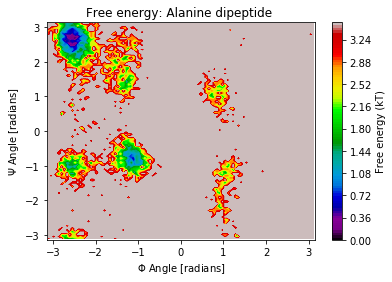

In [14]:
pyEmmaPlot=1
if pyEmmaPlot:
    
    numberOfIterations = 600# 1350
    import pyemma.coordinates as coor
    feat = coor.featurizer(md.Topology().from_openmm(smpl.model.testsystem.topology))
    feat.add_backbone_torsions()
    #inp=[coor.load(dataFolderName+'/Traj/Alaninetraj_'+repr(i)+'.h5', feat, stride=10) for i in range(0,numberOfIterations)]
    inp=[coor.load(dataFolderName+'/shortTraj.h5', feat, stride=1) ]
    print( np.asarray(inp).shape)
    
    
    import pyemma.plots as mplt
    from math import pi

    Y = inp   

    mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1]);
    plt.title('Free energy: Alanine dipeptide ')
    plt.xlabel(r'$\Phi$ Angle [radians]')
    plt.xlim(-pi, pi)
    plt.ylabel(r'$\Psi$ Angle [radians]')
    plt.ylim(-pi, pi)
    #plt.savefig('/Users/zofia/github/DFM/Data/Alanine/'+methodName+'/freeEnergy.png', dpi='figure', bbox_inches='tight')

    plt.show()
   




Get the target density at sampled data points
... might take a while ...
Done
Done


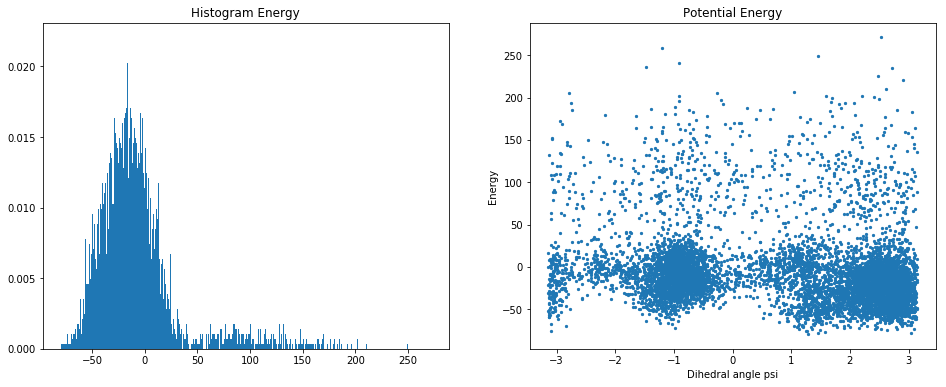

In [15]:

print('Get the target density at sampled data points')
print('... might take a while ...')

"""
target density: exp(-beta V(q)) : [V(q)] = kilojoule/mole, [beta] =  J/mol
"""

E = helpers.computeEnergy(X_FT, smpl)

qTargetDistribution= helpers.computeTargetMeasure(X_FT, smpl, E)
qTargetDistribution_targetTemperature = helpers.computeTargetMeasure(X_FT, smpl_target, E)


fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
cax = ax.hist(E, 1000, normed=True)
ax.set_title('Histogram Energy')


ax2 = fig.add_subplot(122)
cax2 = ax2.scatter(colective_variable(X_FT), E ,s=5 )
ax2.set_xlabel(cv_name)
ax2.set_ylabel('Energy')
ax2.set_title('Potential Energy')

fig.savefig(simulationFolder+'/energy.png')

plt.show()

In [16]:
#metric_choice = 'euclidean'

In [17]:
################ diffusion diffmaps
if metric_choice == 'euclidean':
    epsilon=1

    Xresh=X_FT.reshape(X_FT.shape[0], X_FT.shape[1]*X_FT.shape[2])

    mydmap = dmpy.DiffusionMap(alpha = 1, n_evecs = 1, epsilon = epsilon,  k=5000, metric='euclidean')#, neighbor_params = {'n_jobs':-4})
    dmap = mydmap.fit_transform(Xresh, weights = qTargetDistribution_targetTemperature)

    P = mydmap.P
    evals = mydmap.evals
    evecs = mydmap.evecs

    [evalsT, evecsT] = spsl.eigs(P.transpose(),k=1, which='LM')
    phi = np.real(evecsT.ravel())

    q = mydmap.q

In [18]:
if metric_choice == 'rmsd':
    import scipy.sparse as sps

    traj = md.Trajectory(X_FT, mdl.testsystem.topology)

    indptr = [0]
    indices = []
    data = []
    k = 1000
    epsilon =1

    for i in range(traj.n_frames):
        # compute distances to frame i
        distances = md.rmsd(traj, traj, i)
        # this performs a partial sort so that idx[:k] are the indices of the k smallest elements
        idx = np.argpartition(distances, k)
        # retrieve corresponding k smallest distances
        distances = distances[idx[:k]]
        # append to data structure
        data.extend(np.exp(-1.0/epsilon*distances**2).tolist())
        indices.extend(idx[:k].tolist())
        indptr.append(len(indices))

    kernel_matrix = sps.csr_matrix((data, indices, indptr), dtype=float, shape=(traj.n_frames, traj.n_frames))

    # this is all stolen from pydiffmap
    weights_tmdmap = qTargetDistribution_targetTemperature

    alpha = 1.0
    q = np.array(kernel_matrix.sum(axis=1)).ravel()
    # Apply right normalization
    right_norm_vec = np.power(q, -alpha)
    if weights_tmdmap is not None:
        right_norm_vec *= np.sqrt(weights_tmdmap)

    m = right_norm_vec.shape[0]
    Dalpha = sps.spdiags(right_norm_vec, 0, m, m)
    kernel_matrix = kernel_matrix * Dalpha

    # Perform  row (or left) normalization
    row_sum = kernel_matrix.sum(axis=1).transpose()
    n = row_sum.shape[1]
    Dalpha = sps.spdiags(np.power(row_sum, -1), 0, n, n)
    P = Dalpha * kernel_matrix

    n_evecs = 2

    evals, evecs = spsl.eigs(P, k=(n_evecs+1), which='LM')
    ix = evals.argsort()[::-1][1:]
    evals = np.real(evals[ix])
    evecs = np.real(evecs[:, ix])
    dmap = np.dot(evecs, np.diag(evals))

    [evalsT, evecsT] = spsl.eigs(P.transpose(),k=1, which='LM')
    phi = np.real(evecsT.ravel())

    fig = plt.figure(figsize=(6,6))
    plt.scatter(cv, evecs[:,0], s=5)
    plt.xlabel('Radius')
    plt.ylabel('Dominant eigenvector')
    plt.show()

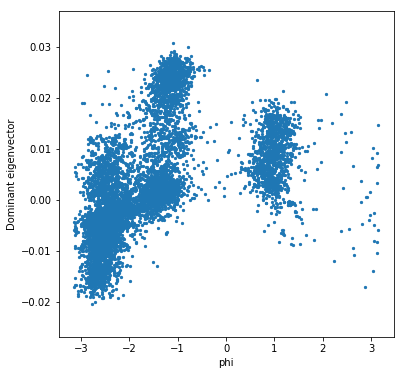

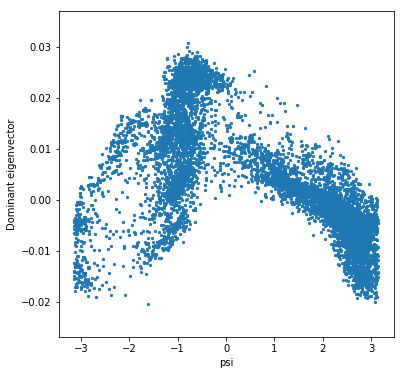

In [19]:
#cv=compute_dihedrals_psi(X_FT)
cv=compute_dihedrals_phi(X_FT)

fig = plt.figure(figsize=(6,6))
plt.scatter(cv, evecs[:,0], s=5)
plt.xlabel('phi')
plt.ylabel('Dominant eigenvector')
plt.show()

#cv=compute_dihedrals_psi(X_FT)
cv=compute_dihedrals_psi(X_FT)

fig = plt.figure(figsize=(6,6))
plt.scatter(cv, evecs[:,0], s=5)
plt.xlabel('psi')
plt.ylabel('Dominant eigenvector')
plt.show()

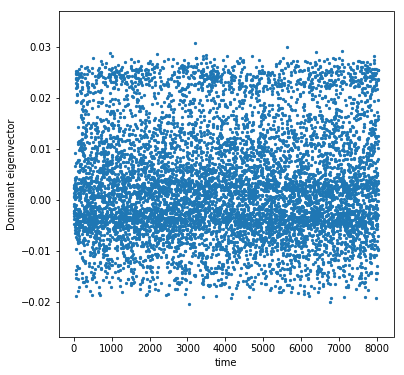

In [20]:
#cv=compute_dihedrals_psi(X_FT)
cv=colective_variable(X_FT)

fig = plt.figure(figsize=(6,6))
plt.scatter(range(len(evecs[:,0])), evecs[:,0], s=5)
plt.xlabel('time')
plt.ylabel('Dominant eigenvector')
plt.show()

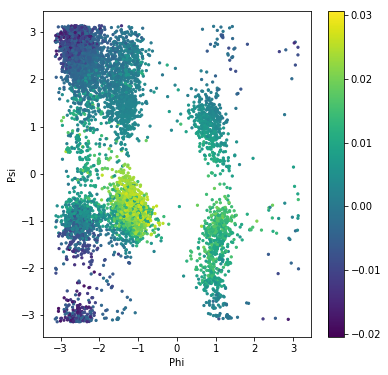

In [21]:
#cv=compute_dihedrals_psi(X_FT)
cv_phi=compute_dihedrals_phi(X_FT)
cv_psi=compute_dihedrals_psi(X_FT)

fig = plt.figure(figsize=(6,6))
plt.scatter(cv_phi, cv_psi, c=evecs[:,0], s=5)
cbar=plt.colorbar()
plt.xlabel('Phi')

plt.ylabel('Psi')
plt.show()

In [22]:
# estimated density by KDE
#q_est = q*phi#mydmap.q
q_est = q*phi
q_estNormalized = q_est/sum(q_est)

qTargetDistributionNormalized = qTargetDistribution/sum(qTargetDistribution)
print("Error on the density: "+repr(np.linalg.norm(q_estNormalized - qTargetDistributionNormalized,1)))

weight = qTargetDistribution_targetTemperature/q

qTargetDistribution_targetTemperature = qTargetDistribution_targetTemperature/sum(qTargetDistribution_targetTemperature)

Error on the density: 0.88494313257230406


/Users/zofia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


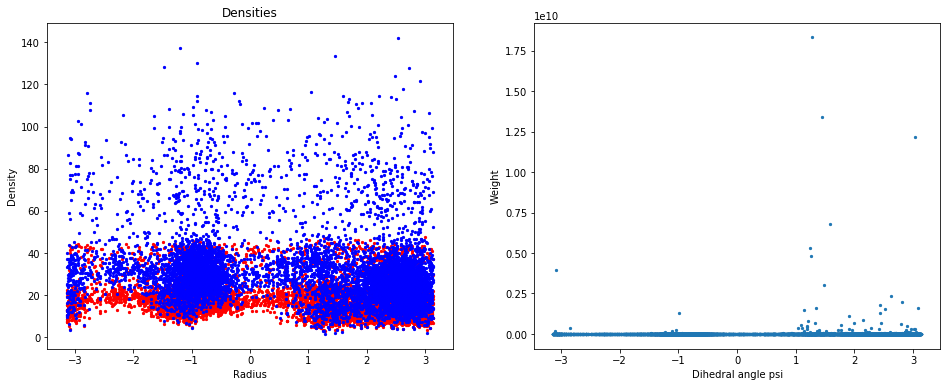

In [23]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.scatter(cv, -np.log(q_estNormalized), s=5, c='r')
ax.scatter(cv, -np.log(qTargetDistribution_targetTemperature), s=5, c='b')
ax.set_xlabel('Radius')
ax.set_ylabel('Density')


ax.set_title('Densities')


ax2 = fig.add_subplot(122)
cax2 = ax2.scatter(cv, weight  ,s=5 )
ax2.set_xlabel(cv_name)
ax2.set_ylabel('Weight')
#ax2.set_title('Potential Energy')

fig.savefig(simulationFolder+'/KDE_weight.png')


plt.show()

In [24]:
weight = qTargetDistribution_targetTemperature/q
cv=compute_dihedrals_psi(X_FT)

free_energy_unbiased, bin_centers_unb = compute_free_energy(cv, nrbins = 20, weights=weight)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(bin_centers, free_energy_300_ref, s=5, c='r', marker='o')
ax.scatter(bin_centers_unb, free_energy_unbiased, s=5, c='g', marker='o')
ax.set_xlabel('dihedral angle')
ax.set_ylabel('Free energy')
#ax.set_ylim([0,10])
plt.show()

NameError: name 'bin_centers' is not defined

In [ ]:
smpl.kT/mdl.kB_const
